In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math

In [3]:
metab_df = pd.read_csv("metab-selected.csv")
metab_df.head()

,Participant,Meal,Time,X4.aminobutanoate,L.Leucine,Uridine,X1.Methylpyrrolinium,Acetylcholine,L.Proline,Succinic.acid,...,gamma.Aminobutyric.acid,X2.Hydroxypyridine,Imidazole,Glycine,Pyridoxamine,Urea,Lysophospholipids,Lysophospho.lipids..odd.chains.,Lysophospho.lipids..even.chains.,Phosphatidyl.glycerol..odd.chain.
0,SC4203,B,120,8.380051,15.462580,10.164953,9.888994,12.154044,9.274081,9.122323,...,11.820377,12.205821,9.500767,11.723448,10.467882,13.955726,15.239961,12.803325,15.148443,14.277567
1,SC4203,B,240,8.459977,14.854934,10.833474,9.847255,12.171617,8.673345,9.132028,...,11.870657,12.276642,9.540442,11.715136,10.414267,13.773704,15.341479,13.413980,15.184226,14.484717
2,DL4204,A,30,8.603734,14.921948,11.528331,10.231741,12.012944,9.028306,9.298341,...,12.470798,11.976179,9.561585,11.448104,10.795886,13.848846,16.116893,13.749212,16.018510,14.696149
3,SC4203,C,120,8.637349,16.209471,10.130751,10.972812,12.376531,10.834322,9.313805,...,12.375098,11.991221,9.498650,11.470929,11.290929,14.136059,15.494890,11.956027,15.465414,13.992957
4,SC4203,A,120,8.646877,14.870384,11.329650,9.971513,12.359129,8.536425,8.978340,...,12.044756,12.063596,9.419683,11.678734,10.518652,13.768024,15.665191,13.518768,15.540872,14.360866


In [14]:
features = metab_df.iloc[:,3:].columns
print(features)

Index(['X4.aminobutanoate', 'L.Leucine', 'Uridine', 'X1.Methylpyrrolinium',
       'Acetylcholine', 'L.Proline', 'Succinic.acid', 'Uric.acid',
       'L.Arginine', 'L.Tryptophan', 'X2.3.4.5.6.7.Hexahydroxyheptanoic.acid',
       'X1.Methylnicotinamide', 'X3.Hexenedioic.acid', 'L.Phenylalanine',
       'cis.Aconitic.acid', 'Citric.acid', 'Isocitric.acid',
       'Aspartyl.L.proline', 'Pyroglutamic.acid', 'L.Glutamic.acid',
       'L.Lysine', 'L.Methionine', 'L.Histidine', 'Methionine.sulfoxide',
       'Citrulline', 'N2.gamma.Glutamylglutamine', 'DOPA.sulfate', 'acetate',
       'Ornithine', 'L.Isoleucine', 'Imidazolelactic.acid', 'L.Tyrosine',
       'N.Acetylglutamine', 'Asymmetric.dimethylarginine', 'Silicic.acid',
       'X3.Furoic.acid', 'Cytosine', 'Pipecolic.acid_2', 'L.Asparagine',
       'L.Cystine', 'Imidazolone', 'L.Serine', 'gamma.Aminobutyric.acid',
       'X2.Hydroxypyridine', 'Imidazole', 'Glycine', 'Pyridoxamine', 'Urea',
       'Lysophospholipids', 'Lysophospho.lipids..

In [15]:
metab_df.shape

(358, 55)

In [16]:
from sklearn.preprocessing import StandardScaler
x = metab_df.loc[:, features]
x = StandardScaler().fit_transform(x)    # normalise features

In [17]:
x.shape
np.mean(x), np.std(x)

(4.992425324313553e-16, 1.0)

In [18]:
from sklearn.decomposition import PCA
pca_metab = PCA(n_components=2)
principalComponent_metab = pca_metab.fit_transform(x)

In [19]:
pc_metab_df = pd.DataFrame(data = principalComponent_metab, columns = ['Principal Component 1',  'Principal Component 2'])

In [20]:
pc_metab_df.head()

,Principal Component 1,Principal Component 2
0,-4.064781,5.099295
1,-5.775566,4.394725
2,-2.835825,-2.359503
3,4.915625,5.512339
4,-4.559072,1.125551


In [21]:
print("Explained variance per principle component: {}".format(pca_metab.explained_variance_ratio_))

Explained variance per principle component: [0.29430262 0.09459795]


<Figure size 640x480 with 0 Axes>

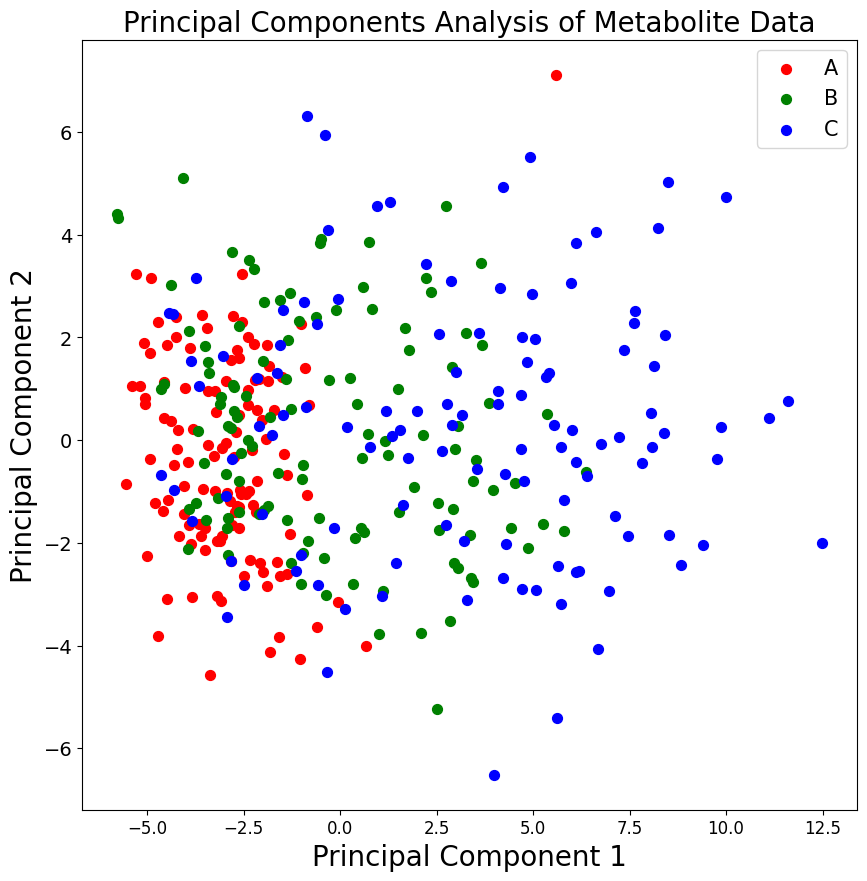

In [22]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Principal Component 1", fontsize = 20)
plt.ylabel("Principal Component 2", fontsize = 20)
plt.title("Principal Components Analysis of Metabolite Data", fontsize = 20)
meals = ['A', 'B', 'C']
colours = ['r', 'g', 'b']

for meal, colour in zip(meals, colours):
    meal_indices = metab_df["Meal"] == meal
    plt.scatter(pc_metab_df.loc[meal_indices, 'Principal Component 1']
                , pc_metab_df.loc[meal_indices, 'Principal Component 2'], c = colour, s = 50)


plt.legend(meals, prop = {'size': 15})

In [47]:
# Finding correlation between PCA Component 1 and features
sorted(pca_metab.components_[0, :] * math.sqrt(pca_metab.singular_values_[0]), reverse = True)
#sorted(pca_metab.components_[0, :], reverse=True)



[2.109936592077372,
 2.073460958395361,
 2.066500816778475,
 2.0439614414969265,
 2.012526194454612,
 1.8966113578570067,
 1.834310961499444,
 1.82401605170175,
 1.8037481316039745,
 1.779797005823184,
 1.7625782619815769,
 1.7277702046171295,
 1.5974317513120417,
 1.5851960151640707,
 1.568158691335572,
 1.492932437201208,
 1.4746436316419116,
 1.3730065225342174,
 1.3696301164000593,
 1.3582803935585386,
 1.104143614877926,
 1.0927168223553292,
 0.999275104896566,
 0.6698326102646216,
 0.6470530312509726,
 0.6245504124928443,
 0.6021062364560212,
 0.5344489275396087,
 0.4190084626559198,
 0.413543021309829,
 0.35106246512787576,
 0.32092561159002325,
 0.27812828695949154,
 0.2187838248148623,
 0.18426187411204464,
 0.09445788711574553,
 0.04059018802699729,
 0.03583977653944289,
 -0.055921548608298455,
 -0.1246481749054736,
 -0.1577453404146028,
 -0.17962615671493276,
 -0.1891496864761808,
 -0.30799004645760214,
 -0.3444858047871504,
 -0.3455431051922998,
 -0.3586151499111265,
 -0.77

In [43]:
np.std(principalComponent_metab[:,1])

2.2179028802907927

In [50]:
math.sqrt(pca_metab.singular_values_[0])

8.603400171439791